In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
import scipy.stats as stats

In [2]:
df = pd.read_csv("data/housing_aspects.csv")
df = df.drop(['Unnamed: 0'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21363 entries, 0 to 21362
Data columns (total 16 columns):
price            21363 non-null float64
bedrooms         21363 non-null int64
bathrooms        21363 non-null float64
sqft_living      21363 non-null int64
sqft_lot         21363 non-null int64
floors           21363 non-null float64
waterfront       21363 non-null float64
view             21363 non-null float64
condition        21363 non-null int64
grade            21363 non-null int64
sqft_above       21363 non-null int64
sqft_basement    21363 non-null float64
yr_built         21363 non-null int64
yr_renovated     21363 non-null float64
sqft_living15    21363 non-null int64
sqft_lot15       21363 non-null int64
dtypes: float64(7), int64(9)
memory usage: 2.6 MB


In [3]:
# creating column "class_scale" based on condition of price
df.loc[df['price'] > 750000, 'class_scale'] = "upper"
df.loc[(df['price'] < 750000) & (df['price'] > 350000), 'class_scale'] = "middle"
df.loc[df['price'] < 350000, 'class_scale'] = "lower"

In [4]:
grouped = df.groupby(['class_scale'])['price', 'grade'].agg(['mean','min', 'max', 'std']).round()
grouped.head()

price                                grade             
                  mean       min        max       std  mean min max  std
class_scale                                                             
lower         266966.0   78000.0   349990.0   54364.0   7.0   3  10  1.0
middle        512829.0  350500.0   749999.0  107866.0   8.0   4  11  1.0
upper        1093453.0  750500.0  4490000.0  426171.0   9.0   5  13  1.0

In [5]:
df.class_scale.value_counts(normalize=True)

middle    0.525465
lower     0.312977
upper     0.161558
Name: class_scale, dtype: float64

In [6]:
one_hot = pd.get_dummies(df['class_scale'], drop_first=True)
df = df.drop('class_scale',axis = 1)
df = df.join(one_hot)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,middle,upper
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,2720,8062,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,1800,7503,1,0


In [8]:
df['condition'].value_counts()

3    13836
4     5641
5     1687
2      170
1       29
Name: condition, dtype: int64

In [9]:
df.loc[df['condition'] == 1, 'condition_value'] = "poor"
df.loc[df['condition'] == 2, 'condition_value'] = "below_avg"
df.loc[df['condition'] == 3, 'condition_value'] = "average"
df.loc[df['condition'] == 4, 'condition_value'] = "above_avg"
df.loc[df['condition'] == 5, 'condition_value'] = "new"

In [10]:
one_hot = pd.get_dummies(df['condition_value'], drop_first=True)
df = df.drop('condition_value',axis = 1)
df = df.join(one_hot)

In [11]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,sqft_living15,sqft_lot15,middle,upper,average,below_avg,new,poor
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,1955,0.0,1340,5650,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1951,1991.0,1690,7639,1,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,1933,0.0,2720,8062,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,1965,0.0,1360,5000,1,0,0,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,1987,0.0,1800,7503,1,0,1,0,0,0


In [12]:
drop_cols = ['waterfront','view','condition','sqft_basement','yr_renovated']
df.drop(drop_cols, axis=1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,sqft_living15,sqft_lot15,middle,upper,average,below_avg,new,poor
0,221900.0,3,1.00,1180,5650,1.0,7,1180,1955,1340,5650,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,7,2170,1951,1690,7639,1,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,6,770,1933,2720,8062,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,7,1050,1965,1360,5000,1,0,0,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,8,1680,1987,1800,7503,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21358,360000.0,3,2.50,1530,1131,3.0,8,1530,2009,1530,1509,1,0,1,0,0,0
21359,400000.0,4,2.50,2310,5813,2.0,8,2310,2014,1830,7200,1,0,1,0,0,0
21360,402101.0,2,0.75,1020,1350,2.0,7,1020,2009,1020,2007,1,0,1,0,0,0
21361,400000.0,3,2.50,1600,2388,2.0,8,1600,2004,1410,1287,1,0,1,0,0,0


# Check for multicolinearity

Features with the highest correlation to price:
    1) upper
    2) sqft_living
    3) grade
    4) sqft_living15

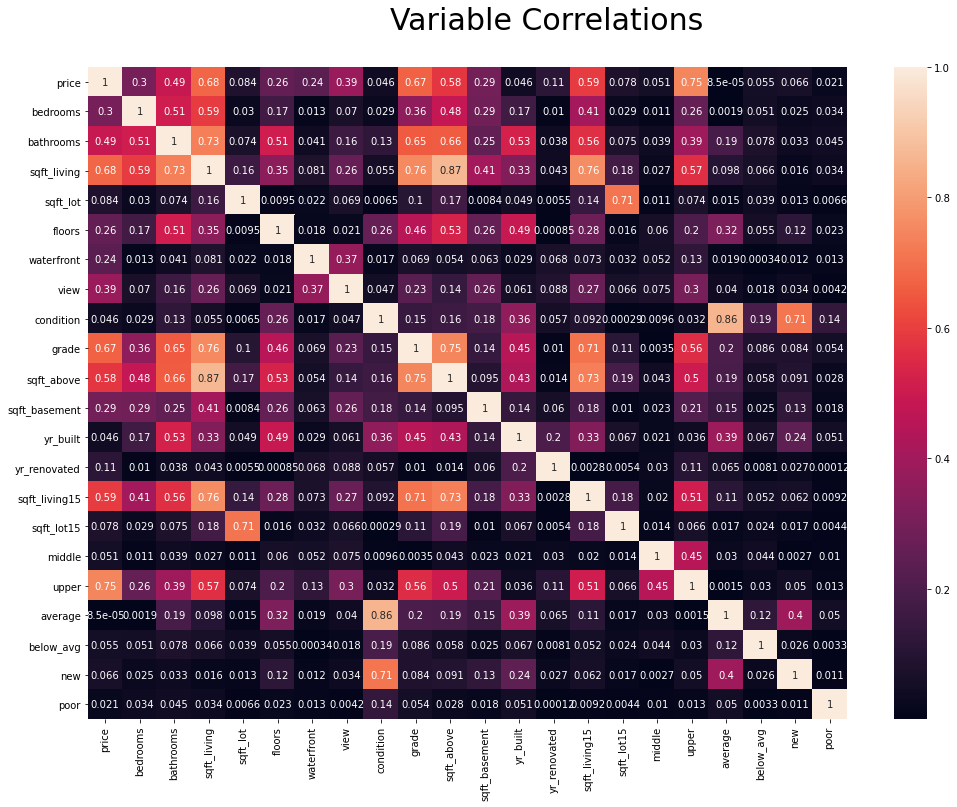

In [13]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95)
heatmap = sns.heatmap(corr, annot=True)
heatmap

In [14]:
features = []
correlations = []
for idx, correlation in corr['price'].T.iteritems():
    if correlation >= .30 and idx != 'price':
        features.append(idx)
        correlations.append(correlation)
corr_price_df = pd.DataFrame({'Correlations':correlations, 'Features': features}).sort_values(by=['Correlations'], ascending=False)

In [15]:

# usually any variables that correlate more than 80%
multicollinear_features = []
multicollinear_corr = []
def check_multicollinearity(feature):
    for idx, correlation in corr[feature].T.iteritems():
        if correlation >= .80 and idx != feature:
            multicollinear_features.append([feature, idx])
            multicollinear_corr.append(correlation)
            
for feature in corr:
    check_multicollinearity(feature)
MC_df = pd.DataFrame({'Correlations':multicollinear_corr, 'Features': multicollinear_features})
print('Multicollinear Features')
display(MC_df)
print('Correlations with Price')
display(corr_price_df)

Multicollinear Features


,Correlations,Features
0,0.866887,"[sqft_living, sqft_above]"
1,0.856292,"[condition, average]"
2,0.866887,"[sqft_above, sqft_living]"
3,0.856292,"[average, condition]"


Correlations with Price


,Correlations,Features
7,0.746257,upper
2,0.677596,sqft_living
4,0.668335,grade
6,0.593674,sqft_living15
5,0.578363,sqft_above
1,0.489138,bathrooms
3,0.386696,view
0,0.302105,bedrooms


In [16]:
outcome = 'price'
x_cols = ['grade', 'bathrooms', 'sqft_living15','condition','upper','middle']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     8754.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:54:09   Log-Likelihood:            -2.8848e+05
No. Observations:               21363   AIC:                         5.770e+05
Df Residuals:                   21356   BIC:                         5.770e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.582e+05   1.31e+04    -27.440      0.000   -3.84e+05   -3.33e+05
grade          6.105e+04   1790.129     34.102      0.000    5.75e+04    6.46e+04
bathrooms      1.428e+04   2267.151      6.298      0.000    9833.679    1.87e+04
sqft_living15    42.7530      2.654     16.112      0.000      37.552      47.954
condition      3.497e+04   1909.300     18.317      0.000    3.12e+04    3.87e+04
upper          6.178e+05   4957.416    124.616      0.000    6.08e+05    6.27e+05
middle         1.714e+05   2932.593     58.458      0.000    1.66e+05    1.77e+05
==============================================================================
Omnibus:                    20076.784   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1556589.893
Skew:                           4.345   Prob(JB):                         0.00
Kurtosis:                      43.905   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,sqft_living15,sqft_lot15,middle,upper,average,below_avg,new,poor
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,1955,0.0,1340,5650,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,1951,1991.0,1690,7639,1,0,1,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,1933,0.0,2720,8062,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,1965,0.0,1360,5000,1,0,0,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,1987,0.0,1800,7503,1,0,1,0,0,0


C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


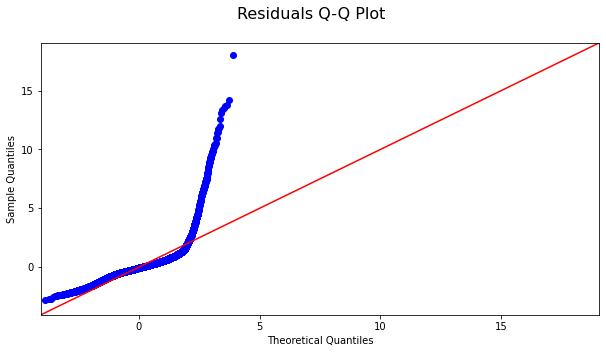

In [18]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

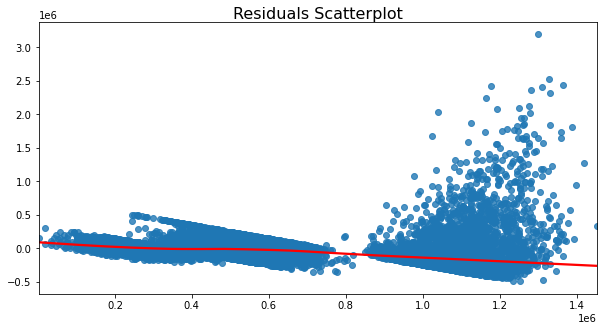

In [19]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

the only reason this increased below is used more predictors

In [24]:
df['price'] = np.log(df['price'])

In [26]:
# these helped (slightly) before normalizing price, but after, they had negative effect so I took them out:
# 'below_avg','poor','new'
outcome = 'price'
x_cols = ['grade', 'bathrooms', 'sqft_living15','condition','upper','middle']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula=formula, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                 1.643e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:01:52   Log-Likelihood:                 2319.7
No. Observations:               21363   AIC:                            -4625.
Df Residuals:                   21356   BIC:                            -4570.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        11.5825      0.016    724.271      0.000      11.551      11.614
grade             0.0826      0.002     37.683      0.000       0.078       0.087
bathrooms         0.0385      0.003     13.862      0.000       0.033       0.044
sqft_living15  6.013e-05   3.25e-06     18.496      0.000    5.38e-05    6.65e-05
condition         0.0517      0.002     22.087      0.000       0.047       0.056
upper             1.0658      0.006    175.500      0.000       1.054       1.078
middle            0.5367      0.004    149.382      0.000       0.530       0.544
==============================================================================
Omnibus:                     1030.482   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2603.528
Skew:                           0.272   Prob(JB):                         0.00
Kurtosis:                       4.621   Cond. No.                     2.31e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\15514\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


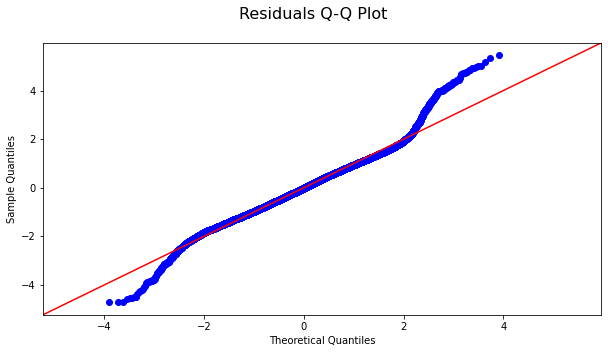

In [27]:
residuals = model2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.suptitle('Residuals Q-Q Plot', fontsize=16)
fig.set_size_inches(10,5)
fig.show()

Text(0.5, 0.99, 'Residuals Scatterplot')

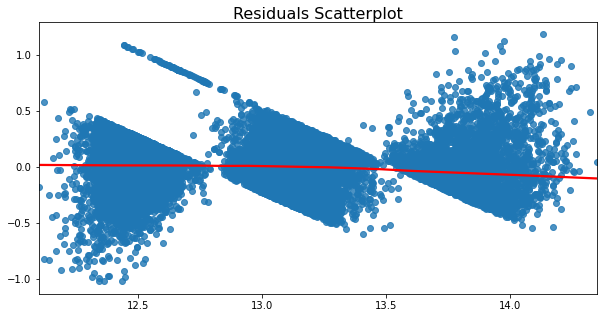

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(x=model2.predict(), y=model2.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot', fontsize=16, y=.99)

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'view', 'condition', 'yr_built', 'yr_renovated', 'sqft_lot15'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X)

       bathrooms  sqft_living  grade  sqft_living15  middle  upper  average  \
0           1.00         1180      7           1340       0      0        1   
1           2.25         2570      7           1690       1      0        1   
2           1.00          770      6           2720       0      0        1   
3           3.00         1960      7           1360       1      0        0   
4           2.00         1680      8           1800       1      0        1   
...          ...          ...    ...            ...     ...    ...      ...   
21358       2.50         1530      8           1530       1      0        1   
21359       2.50         2310      8           1830       1      0        1   
21360       0.75         1020      7           1020       1      0        1   
21361       2.50         1600      8           1410       1      0        1   
21362       0.75         1020      7           1020       0      0        1   

       below_avg  new  poor  
0              0    0

In [33]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16022 5341 16022 5341


In [34]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [36]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [37]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.046279141571487735
Test Mean Squarred Error: 0.045542284906762924


In [38]:
# Accuracy is 82.6%
linreg.score(X_test,y_test)

0.8267522626714183